In [1]:
import re
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# "magic" command to make plots show up in the notebook
%matplotlib inline 


In [2]:
# Import library
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

# 1. Exploratory Data Analysis

> Get an understanding for which variables are important, view summary statistics, and visualize the data

In [3]:
data = pd.read_csv('LendingClub_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345310 entries, 0 to 1345309
Data columns (total 91 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1345310 non-null  int64  
 1   id                          1345310 non-null  int64  
 2   loan_amnt                   1345310 non-null  float64
 3   funded_amnt                 1345310 non-null  float64
 4   funded_amnt_inv             1345310 non-null  float64
 5   term                        1345310 non-null  object 
 6   int_rate                    1345310 non-null  float64
 7   installment                 1345310 non-null  float64
 8   grade                       1345310 non-null  object 
 9   sub_grade                   1345310 non-null  object 
 10  emp_title                   1259525 non-null  object 
 11  emp_length                  1266799 non-null  object 
 12  home_ownership              1345310 non-null  object 
 1

In [5]:
# print(f"\033[1m\033[94mTotal null:\n{55 * '-'}")
# print(f"\033[30m{data.isnull().sum()}")
# data.head()

In [6]:
data.describe()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344936e+06,1.345310e+06,...,1.277783e+06,1.277783e+06,1.277629e+06,1.283755e+06,1.344613e+06,1.345271e+06,1.277783e+06,1.298029e+06,1.298029e+06,1.277783e+06
mean,1.078824e+06,5.634499e+07,1.441997e+04,1.441156e+04,1.438914e+04,1.323962e+01,4.380755e+02,7.624764e+04,1.828267e+01,3.177944e-01,...,8.888364e-02,2.178887e+00,9.416467e+01,4.515598e+01,1.344439e-01,5.213002e-02,1.743878e+05,4.966635e+04,2.163400e+04,4.213319e+04
std,6.841849e+05,3.836114e+07,8.717051e+03,8.713118e+03,8.715494e+03,4.768716e+00,2.615126e+02,6.992510e+04,1.116045e+01,8.779922e-01,...,5.040854e-01,1.845039e+00,8.744124e+00,3.600723e+01,3.779285e-01,3.979113e-01,1.780961e+05,4.774363e+04,2.155478e+04,4.325213e+04
min,0.000000e+00,5.473400e+04,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.783052e+05,2.002774e+07,8.000000e+03,8.000000e+03,7.875000e+03,9.750000e+00,2.484800e+02,4.578000e+04,1.179000e+01,0.000000e+00,...,0.000000e+00,1.000000e+00,9.130000e+01,1.000000e+01,0.000000e+00,0.000000e+00,4.962050e+04,2.088600e+04,7.800000e+03,1.473800e+04
50%,1.118210e+06,5.773466e+07,1.200000e+04,1.200000e+04,1.200000e+04,1.274000e+01,3.754300e+02,6.500000e+04,1.761000e+01,0.000000e+00,...,0.000000e+00,2.000000e+00,9.800000e+01,4.290000e+01,0.000000e+00,0.000000e+00,1.123730e+05,3.729600e+04,1.510000e+04,3.168100e+04
75%,1.755354e+06,8.454605e+07,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.807300e+02,9.000000e+04,2.406000e+01,0.000000e+00,...,0.000000e+00,3.000000e+00,1.000000e+02,7.500000e+01,0.000000e+00,0.000000e+00,2.520760e+05,6.254800e+04,2.810000e+04,5.663500e+04
max,2.260697e+06,1.456364e+08,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.990000e+02,3.900000e+01,...,3.900000e+01,3.200000e+01,1.000000e+02,1.000000e+02,1.200000e+01,8.500000e+01,9.999999e+06,3.408095e+06,1.105500e+06,2.101913e+06


In [7]:
data[data.isna().any(axis=1)]

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
2,2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
4,5,68426831,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0
9,12,68338832,1400.0,1400.0,1400.0,36 months,12.88,47.10,C,C2,...,0.0,1.0,100.0,75.0,0.0,0.0,372109.0,75258.0,34500.0,55501.0
11,14,68466961,28000.0,28000.0,28000.0,36 months,6.49,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
15,19,68495092,8650.0,8650.0,8650.0,36 months,19.89,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345259,2260595,90081014,12800.0,12800.0,12800.0,60 months,9.49,268.77,B,B2,...,0.0,2.0,94.1,16.7,0.0,0.0,232740.0,56544.0,35600.0,28000.0
1345272,2260623,90053125,27950.0,27950.0,27925.0,60 months,13.99,650.21,C,C3,...,0.0,0.0,100.0,33.3,0.0,0.0,402391.0,40723.0,40500.0,15582.0
1345296,2260672,89876723,38000.0,38000.0,38000.0,60 months,13.49,874.18,C,C2,...,0.0,1.0,78.3,33.3,0.0,0.0,332200.0,35020.0,72000.0,14400.0
1345303,2260685,89007204,36400.0,36400.0,36400.0,60 months,14.49,856.24,C,C4,...,0.0,2.0,100.0,75.0,0.0,0.0,529965.0,137277.0,43500.0,90665.0


In [8]:
data.loan_status.value_counts()

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

> Current status of the loan
1: Charged Off
0: Fully Paid

In [9]:
data['charged_off'] = data.loan_status.map({'Fully Paid': 0, 'Charged Off': 1})
data[['loan_status', 'charged_off']].head(10)

,loan_status,charged_off
0,Fully Paid,0
1,Fully Paid,0
2,Fully Paid,0
3,Fully Paid,0
4,Fully Paid,0
5,Fully Paid,0
6,Fully Paid,0
7,Fully Paid,0
8,Fully Paid,0
9,Fully Paid,0


Fully Paid = 1076751
Not Fully Paid (Charged Off) = 268559
% Charged Off/Fully Paid = 24.94%


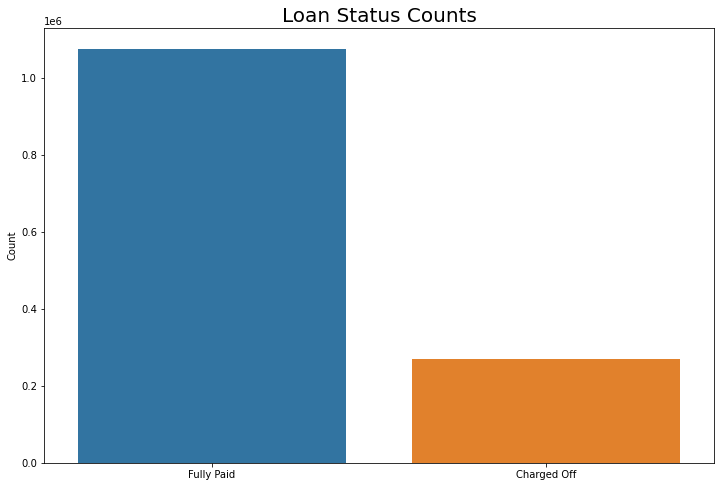

In [10]:
notPaid = data[data["charged_off"] == 1].shape[0]
fullPaid = data[data["charged_off"] == 0].shape[0]

print(f"Fully Paid = {fullPaid}");
print(f"Not Fully Paid (Charged Off) = {notPaid}");
print(f"% Charged Off/Fully Paid = {(notPaid/fullPaid) * 100:.2f}%");

plt.figure(figsize=(12, 8));
sns.countplot(data["charged_off"]);
plt.xticks((1, 0), ["Charged Off", "Fully Paid"]);
plt.xlabel("");
plt.ylabel("Count");
plt.title("Loan Status Counts", y=1, fontdict={"fontsize": 20});

# 1.1 Correlation Matrix

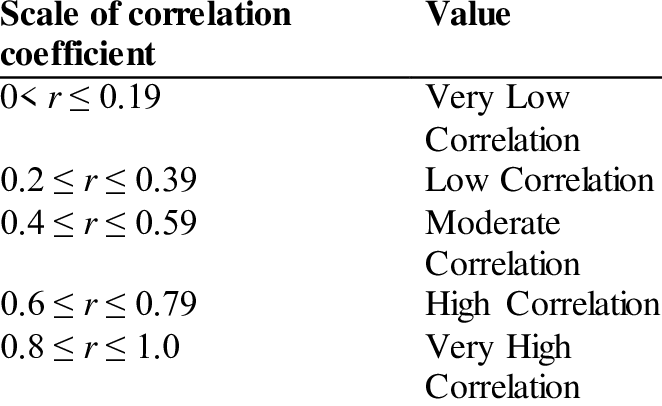

In [11]:
selected_features=['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership',
                   'annual_inc','verification_status','issue_d','purpose','title','dti','earliest_cr_line','inq_last_6mths',
                   'open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type','mort_acc',
                   'last_pymnt_amnt',
                    'pub_rec_bankruptcies','addr_state','fico_range_low','fico_range_high','loan_status']

In [12]:
len(selected_features)

31

In [13]:
df = pd.read_csv('LendingClub_data.csv',usecols=selected_features, low_memory=False)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,7.0,0.0,2765.0,29.7,13.0,w,122.67,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,22.0,0.0,21470.0,19.2,38.0,w,926.35,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,6.0,0.0,7869.0,56.2,18.0,w,15813.30,Joint App,5.0,0.0
3,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,12.0,0.0,21929.0,64.5,35.0,w,10128.96,Individual,6.0,0.0
4,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,...,5.0,0.0,8822.0,68.4,6.0,w,7653.56,Individual,0.0,0.0


In [14]:
df['charged_off'] = df.loan_status.map({'Fully Paid': 0, 'Charged Off': 1})
df[['loan_status', 'charged_off']].head(10)

,loan_status,charged_off
0,Fully Paid,0
1,Fully Paid,0
2,Fully Paid,0
3,Fully Paid,0
4,Fully Paid,0
5,Fully Paid,0
6,Fully Paid,0
7,Fully Paid,0
8,Fully Paid,0
9,Fully Paid,0


Fully Paid = 1076751
Not Fully Paid (Charged Off) = 268559
% Charged Off/Fully Paid = 24.94%


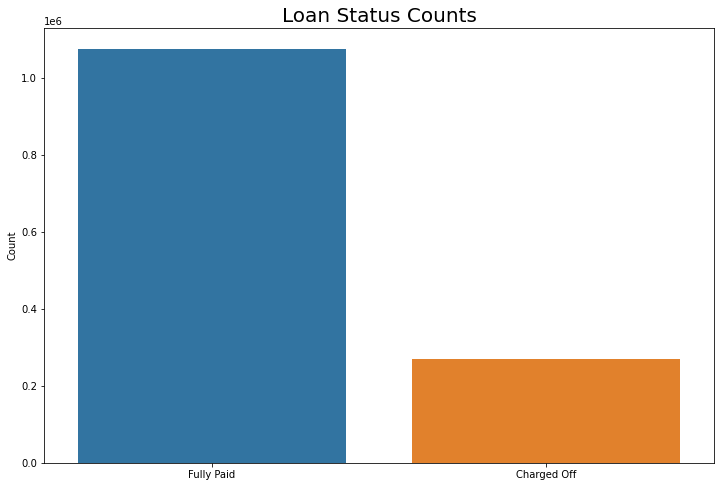

In [15]:
notPaid = df[df["charged_off"] == 1].shape[0]
fullPaid = df[df["charged_off"] == 0].shape[0]

print(f"Fully Paid = {fullPaid}");
print(f"Not Fully Paid (Charged Off) = {notPaid}");
print(f"% Charged Off/Fully Paid = {(notPaid/fullPaid) * 100:.2f}%");

plt.figure(figsize=(12, 8));
sns.countplot(df["charged_off"]);
plt.xticks((1, 0), ["Charged Off", "Fully Paid"]);
plt.xlabel("");
plt.ylabel("Count");
plt.title("Loan Status Counts", y=1, fontdict={"fontsize": 20});

Text(0.5, 1.0, 'Feature Correlation')

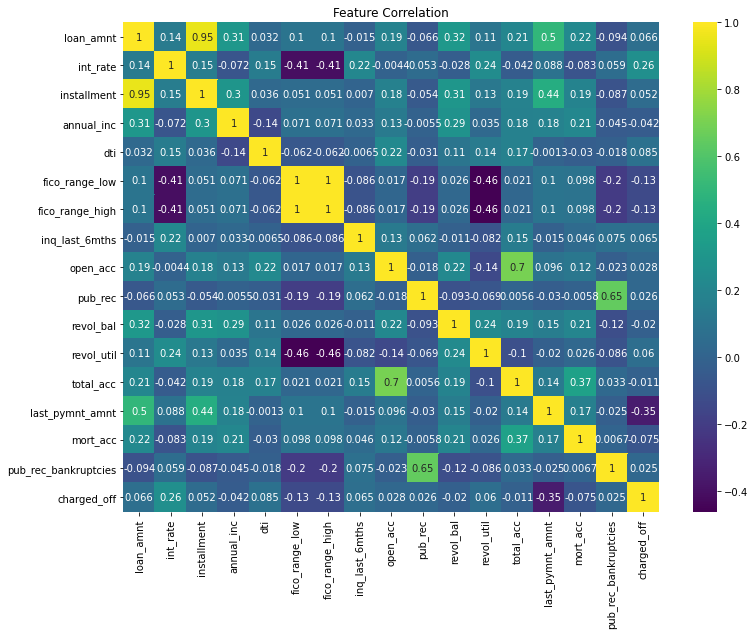

In [16]:
plt.figure(figsize=(12,9))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap='viridis')
plt.title('Feature Correlation')

Text(0.5, 1.0, 'installment / loan_amnt corr')

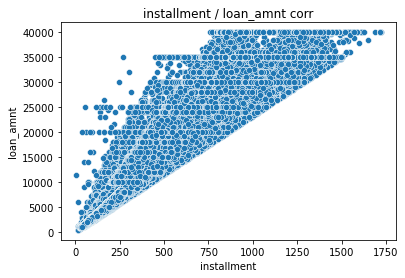

In [17]:
sns.scatterplot(data = df, x = 'installment', y = 'loan_amnt')
plt.title('installment / loan_amnt corr')

In [18]:
df.drop(['installment',
        'total_acc',
        'pub_rec'],
        axis=1,
       inplace=True)

In [19]:
df.shape

(1345310, 29)

Text(0.5, 1.0, 'Boxplot Charged Off / Loan Amount')

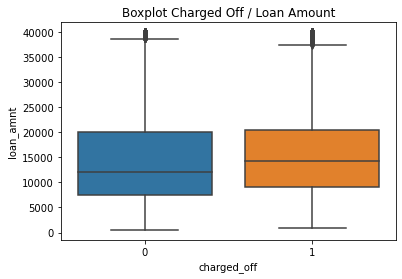

In [20]:
sns.boxplot(data = df, x = 'charged_off', y = 'loan_amnt')
plt.title('Boxplot Charged Off / Loan Amount')

In [21]:
df.grade.unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

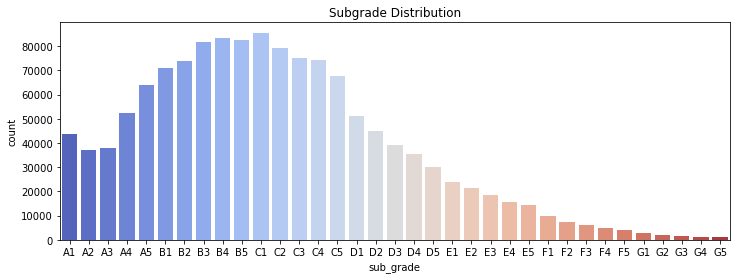

In [22]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm')
plt.title('Subgrade Distribution');

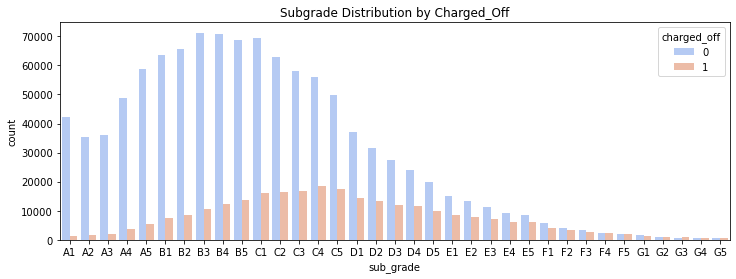

In [23]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm', hue='charged_off' )
plt.title('Subgrade Distribution by Charged_Off');

In [24]:
df.drop('loan_status', axis=1, inplace=True)

In [25]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.376597
emp_length              5.835904
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   1.238302
addr_state              0.000000
dti                     0.027800
earliest_cr_line        0.000000
fico_range_low          0.000000
fico_range_high         0.000000
inq_last_6mths          0.000074
open_acc                0.000000
revol_bal               0.000000
revol_util              0.063703
initial_list_status     0.000000
last_pymnt_amnt         0.000000
application_type        0.000000
mort_acc                3.514506
pub_rec_bankruptcies    0.051810
charged_off             0.000000
dtype: float64

In [26]:
df.emp_title.value_counts()

Teacher                     21268
Manager                     19470
Owner                       10302
Registered Nurse             8774
RN                           8522
                            ...  
Senior DW Engineer              1
Maturnity Nurse Manager         1
metrocast communications        1
Broker in charge                1
English Advisor                 1
Name: emp_title, Length: 378353, dtype: int64

In [27]:
df.emp_title.value_counts().count()

378353

In [28]:
df.drop('emp_title', axis=1, inplace=True)

In [29]:
sorted(df.emp_length.dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [30]:
length_order = ['< 1 year', '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

Text(0.5, 1.0, 'employee length Distribution')

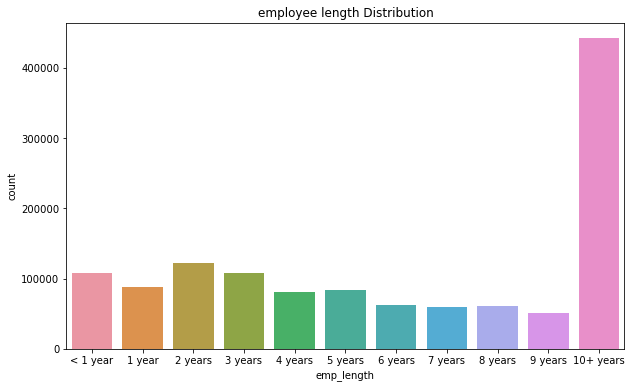

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'emp_length', order=length_order)
plt.title('employee length Distribution')

Text(0.5, 1.0, 'employee length by Loan status')

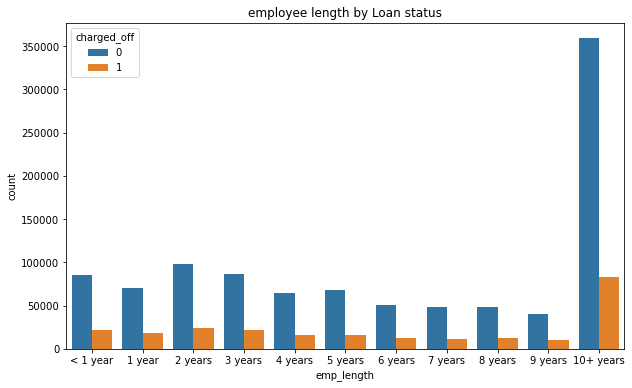

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'emp_length', hue='charged_off', order=length_order)
plt.title('employee length by Loan status')

In [33]:
temp1 = df[df.charged_off == 0].groupby('emp_length').charged_off.count()
temp2 = df[df.charged_off == 1].groupby('emp_length').charged_off.count()

Text(0.5, 1.0, 'Emp.Length Fully Paid/Charged Off Ratio')

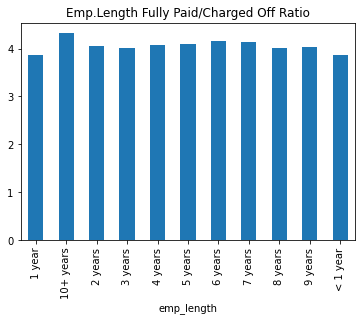

In [34]:
(temp1/temp2).plot(kind='bar')
plt.title('Emp.Length Fully Paid/Charged Off Ratio')

In [35]:
df.drop('emp_length', axis=1, inplace=True)

In [36]:
round(df.isnull().sum()/len(df),2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
grade                   0.00
sub_grade               0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
purpose                 0.00
title                   0.01
addr_state              0.00
dti                     0.00
earliest_cr_line        0.00
fico_range_low          0.00
fico_range_high         0.00
inq_last_6mths          0.00
open_acc                0.00
revol_bal               0.00
revol_util              0.00
initial_list_status     0.00
last_pymnt_amnt         0.00
application_type        0.00
mort_acc                0.04
pub_rec_bankruptcies    0.00
charged_off             0.00
dtype: float64

In [37]:
df.dropna(inplace=True)

In [38]:
print("Missing values: ",df.isnull().sum().sum())

Missing values:  0


In [39]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'title',
       'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'revol_util', 'initial_list_status', 'last_pymnt_amnt',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'charged_off'],
      dtype='object')

In [40]:
df.drop('title', axis=1, inplace=True)
df.drop('addr_state', axis=1, inplace=True)

In [41]:
df['fico_range'] = (df.fico_range_high+df.fico_range_low)/2
df.drop(['fico_range_low','fico_range_high'], axis=1, inplace=True)

In [42]:
df.select_dtypes(exclude=["category", "object"])

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,last_pymnt_amnt,mort_acc,pub_rec_bankruptcies,charged_off,fico_range
0,3600.0,13.99,55000.0,5.91,1.0,7.0,2765.0,29.7,122.67,1.0,0.0,0,677.0
1,24700.0,11.99,65000.0,16.06,4.0,22.0,21470.0,19.2,926.35,4.0,0.0,0,717.0
3,10400.0,22.45,104433.0,25.37,3.0,12.0,21929.0,64.5,10128.96,6.0,0.0,0,697.0
4,11950.0,13.44,34000.0,10.20,0.0,5.0,8822.0,68.4,7653.56,0.0,0.0,0,692.0
5,20000.0,9.17,180000.0,14.67,0.0,12.0,87329.0,84.5,15681.05,4.0,0.0,0,682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345305,18000.0,9.49,130000.0,20.59,1.0,17.0,23833.0,34.0,12828.77,3.0,0.0,0,737.0
1345306,29400.0,13.99,180792.0,22.03,1.0,16.0,77480.0,85.2,22192.81,3.0,0.0,0,707.0
1345307,32000.0,14.49,157000.0,10.34,0.0,14.0,111598.0,27.4,752.74,3.0,0.0,1,737.0
1345308,16000.0,12.79,150000.0,12.25,0.0,12.0,7700.0,55.0,12874.54,0.0,3.0,0,667.0


# Feature Scaling

In [43]:
df.select_dtypes(exclude=["category", "object"])

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,last_pymnt_amnt,mort_acc,pub_rec_bankruptcies,charged_off,fico_range
0,3600.0,13.99,55000.0,5.91,1.0,7.0,2765.0,29.7,122.67,1.0,0.0,0,677.0
1,24700.0,11.99,65000.0,16.06,4.0,22.0,21470.0,19.2,926.35,4.0,0.0,0,717.0
3,10400.0,22.45,104433.0,25.37,3.0,12.0,21929.0,64.5,10128.96,6.0,0.0,0,697.0
4,11950.0,13.44,34000.0,10.20,0.0,5.0,8822.0,68.4,7653.56,0.0,0.0,0,692.0
5,20000.0,9.17,180000.0,14.67,0.0,12.0,87329.0,84.5,15681.05,4.0,0.0,0,682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345305,18000.0,9.49,130000.0,20.59,1.0,17.0,23833.0,34.0,12828.77,3.0,0.0,0,737.0
1345306,29400.0,13.99,180792.0,22.03,1.0,16.0,77480.0,85.2,22192.81,3.0,0.0,0,707.0
1345307,32000.0,14.49,157000.0,10.34,0.0,14.0,111598.0,27.4,752.74,3.0,0.0,1,737.0
1345308,16000.0,12.79,150000.0,12.25,0.0,12.0,7700.0,55.0,12874.54,0.0,3.0,0,667.0


In [44]:
target = df.charged_off.astype('int')
features = df.drop('charged_off', axis=1)
features.head(10)

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,...,inq_last_6mths,open_acc,revol_bal,revol_util,initial_list_status,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies,fico_range
0,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,debt_consolidation,...,1.0,7.0,2765.0,29.7,w,122.67,Individual,1.0,0.0,677.0
1,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,small_business,...,4.0,22.0,21470.0,19.2,w,926.35,Individual,4.0,0.0,717.0
3,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,major_purchase,...,3.0,12.0,21929.0,64.5,w,10128.96,Individual,6.0,0.0,697.0
4,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,debt_consolidation,...,0.0,5.0,8822.0,68.4,w,7653.56,Individual,0.0,0.0,692.0
5,20000.0,36 months,9.17,B,B2,MORTGAGE,180000.0,Not Verified,Dec-2015,debt_consolidation,...,0.0,12.0,87329.0,84.5,f,15681.05,Individual,4.0,0.0,682.0
6,20000.0,36 months,8.49,B,B1,MORTGAGE,85000.0,Not Verified,Dec-2015,major_purchase,...,0.0,8.0,826.0,5.7,w,14618.23,Individual,3.0,0.0,707.0
7,10000.0,36 months,6.49,A,A2,RENT,85000.0,Not Verified,Dec-2015,credit_card,...,1.0,14.0,10464.0,34.5,w,1814.48,Individual,1.0,1.0,687.0
8,8000.0,36 months,11.48,B,B5,MORTGAGE,42000.0,Not Verified,Dec-2015,credit_card,...,0.0,8.0,7034.0,39.1,w,4996.24,Individual,1.0,0.0,702.0
10,18000.0,60 months,19.48,E,E2,RENT,150000.0,Not Verified,Dec-2015,debt_consolidation,...,1.0,18.0,14052.0,40.7,w,471.70,Individual,2.0,1.0,667.0
11,28000.0,36 months,6.49,A,A2,MORTGAGE,92000.0,Not Verified,Dec-2015,debt_consolidation,...,0.0,16.0,51507.0,64.5,w,17093.51,Individual,2.0,0.0,722.0


In [45]:
numeric_features = features.select_dtypes(exclude=['object', 'category'])
numeric_features.head()

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,last_pymnt_amnt,mort_acc,pub_rec_bankruptcies,fico_range
0,3600.0,13.99,55000.0,5.91,1.0,7.0,2765.0,29.7,122.67,1.0,0.0,677.0
1,24700.0,11.99,65000.0,16.06,4.0,22.0,21470.0,19.2,926.35,4.0,0.0,717.0
3,10400.0,22.45,104433.0,25.37,3.0,12.0,21929.0,64.5,10128.96,6.0,0.0,697.0
4,11950.0,13.44,34000.0,10.20,0.0,5.0,8822.0,68.4,7653.56,0.0,0.0,692.0
5,20000.0,9.17,180000.0,14.67,0.0,12.0,87329.0,84.5,15681.05,4.0,0.0,682.0


In [46]:
numeric_features.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'revol_util', 'last_pymnt_amnt', 'mort_acc',
       'pub_rec_bankruptcies', 'fico_range'],
      dtype='object')

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled = sc.fit_transform(numeric_features)
print(scaled)

[[-1.25028188  0.14866524 -0.30694753 ... -0.33604368 -0.36022032
  -0.65203737]
 [ 1.16491765 -0.26879883 -0.1649339  ...  1.16241056 -0.36022032
   0.61583632]
 [-0.47192374  1.91453826  0.39506841 ...  2.16138006 -0.36022032
  -0.01810052]
 ...
 [ 2.00050801  0.25303126  1.14159141 ...  0.66292581 -0.36022032
   1.24977317]
 [ 0.16907709 -0.1018132   1.04218188 ... -0.83552843  7.49344919
  -0.96900579]
 [ 1.08479255  0.25303126  0.47412739 ...  0.16344106  2.25766952
  -1.12749   ]]


In [48]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
purpose                  object
dti                     float64
earliest_cr_line         object
inq_last_6mths          float64
open_acc                float64
revol_bal               float64
revol_util              float64
initial_list_status      object
last_pymnt_amnt         float64
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
charged_off               int64
fico_range              float64
dtype: object

In [49]:
scaled_features = pd.DataFrame(scaled, columns=['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'revol_util', 'last_pymnt_amnt', 'mort_acc',
       'pub_rec_bankruptcies', 'fico_range'], index=df.index)
scaled_features.head()

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,last_pymnt_amnt,mort_acc,pub_rec_bankruptcies,fico_range
0,-1.250282,0.148665,-0.306948,-1.111719,0.377035,-0.852914,-0.603491,-0.909127,-0.752826,-0.336044,-0.36022,-0.652037
1,1.164918,-0.268799,-0.164934,-0.211684,3.593066,1.878238,0.226793,-1.339627,-0.640828,1.162411,-0.36022,0.615836
3,-0.471924,1.914538,0.395068,0.613865,2.521056,0.057470,0.247167,0.517673,0.641620,2.161380,-0.36022,-0.018101
4,-0.294504,0.033863,-0.605176,-0.731310,-0.694975,-1.217068,-0.334631,0.677573,0.296655,-0.835528,-0.36022,-0.176585
5,0.626935,-0.857423,1.468223,-0.334940,-0.694975,0.057470,3.150166,1.337673,1.415342,1.162411,-0.36022,-0.493553


In [50]:
scaled_features.isnull().sum()

loan_amnt               0
int_rate                0
annual_inc              0
dti                     0
inq_last_6mths          0
open_acc                0
revol_bal               0
revol_util              0
last_pymnt_amnt         0
mort_acc                0
pub_rec_bankruptcies    0
fico_range              0
dtype: int64

In [51]:
scaled_features.shape

(1280230, 12)

In [52]:
object_features = df.select_dtypes(['object', 'category'])
one_hot_features=pd.get_dummies(object_features, drop_first=True)
one_hot_features.head()

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,...,earliest_cr_line_Sep-2008,earliest_cr_line_Sep-2009,earliest_cr_line_Sep-2010,earliest_cr_line_Sep-2011,earliest_cr_line_Sep-2012,earliest_cr_line_Sep-2013,earliest_cr_line_Sep-2014,earliest_cr_line_Sep-2015,initial_list_status_w,application_type_Joint App
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
one_hot_features.shape

(1280230, 878)

In [54]:
one_hot_features.isnull().sum().sum()

0

In [55]:
model_df = scaled_features.merge(one_hot_features, on=scaled_features.index)
model_df.head()

,key_0,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,last_pymnt_amnt,...,earliest_cr_line_Sep-2008,earliest_cr_line_Sep-2009,earliest_cr_line_Sep-2010,earliest_cr_line_Sep-2011,earliest_cr_line_Sep-2012,earliest_cr_line_Sep-2013,earliest_cr_line_Sep-2014,earliest_cr_line_Sep-2015,initial_list_status_w,application_type_Joint App
0,0,-1.250282,0.148665,-0.306948,-1.111719,0.377035,-0.852914,-0.603491,-0.909127,-0.752826,...,0,0,0,0,0,0,0,0,1,0
1,1,1.164918,-0.268799,-0.164934,-0.211684,3.593066,1.878238,0.226793,-1.339627,-0.640828,...,0,0,0,0,0,0,0,0,1,0
2,3,-0.471924,1.914538,0.395068,0.613865,2.521056,0.057470,0.247167,0.517673,0.641620,...,0,0,0,0,0,0,0,0,1,0
3,4,-0.294504,0.033863,-0.605176,-0.731310,-0.694975,-1.217068,-0.334631,0.677573,0.296655,...,0,0,0,0,0,0,0,0,1,0
4,5,0.626935,-0.857423,1.468223,-0.334940,-0.694975,0.057470,3.150166,1.337673,1.415342,...,0,0,0,0,0,0,0,0,0,0


In [56]:
model_features = df.drop('charged_off', axis=1)
model_target = df.charged_off

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(model_features, model_target, test_size=0.2, random_state=42)
print("X_train shape: Obs- {} / col- {}".format(X_train.shape[0], X_train.shape[1]))
print("X_test shape: Obs- {} / col- {}".format(X_test.shape[0], X_test.shape[1]))
print("y_train shape: Obs- {} / col- {}".format(y_train.shape[0], 0))
print("y_test shape: Obs- {} / col- {}".format(y_test.shape[0], 0))

X_train shape: Obs- 1024184 / col- 22
X_test shape: Obs- 256046 / col- 22
y_train shape: Obs- 1024184 / col- 0
y_test shape: Obs- 256046 / col- 0


In [58]:
model_numeric_features = X_train.select_dtypes(exclude=['object', 'category']).columns
model_categorical_features = X_train.select_dtypes(['object', 'category']).columns

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('one_hot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, model_numeric_features),
        ('categorical', categorical_transformer, model_categorical_features)
    ]
)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='liblinear'))])

clf.fit(X_train, y_train)
clf_preds = clf.predict(X_test)

[[194597  10202]
 [ 18646  32601]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93    204799
           1       0.76      0.64      0.69     51247

    accuracy                           0.89    256046
   macro avg       0.84      0.79      0.81    256046
weighted avg       0.88      0.89      0.88    256046

Logistic Regression accuracy:  0.8873327448974012


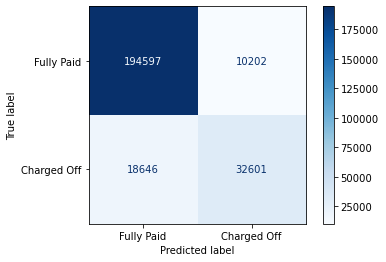

In [60]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,clf_preds))
print(classification_report(y_test,clf_preds))
print('Logistic Regression accuracy: ', accuracy_score(y_test, clf_preds)) 
plot_confusion_matrix(clf, X_test,y_test,cmap= 'Blues',values_format="d", display_labels = ['Fully Paid', 'Charged Off'])

In [61]:
from sklearn.tree import DecisionTreeClassifier #import library

dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0))])
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

[[202035   2764]
 [ 32533  18714]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92    204799
           1       0.87      0.37      0.51     51247

    accuracy                           0.86    256046
   macro avg       0.87      0.68      0.72    256046
weighted avg       0.86      0.86      0.84    256046

Decision Tree accuracy:  0.862145864414988


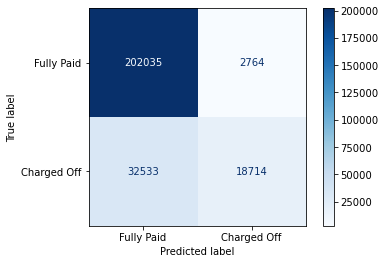

In [62]:
print(confusion_matrix(y_test,dt_preds))
print(classification_report(y_test,dt_preds))
print('Decision Tree accuracy: ', accuracy_score(y_test, dt_preds)) 
plot_confusion_matrix(dt, X_test,y_test,cmap= 'Blues',values_format="d", display_labels = ['Fully Paid', 'Charged Off'])

In [63]:
from sklearn.ensemble import RandomForestClassifier

clf_random = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_depth = 15,             
                                  max_features = 10, 
                                  min_samples_split = 8, 
                                  n_estimators = 100))])
clf_random.fit(X_train, y_train)
random_preds = clf_random.predict(X_test)

[[204799      0]
 [ 51247      0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89    204799
           1       0.00      0.00      0.00     51247

    accuracy                           0.80    256046
   macro avg       0.40      0.50      0.44    256046
weighted avg       0.64      0.80      0.71    256046

Random Forest accuracy:  0.7998523702772158


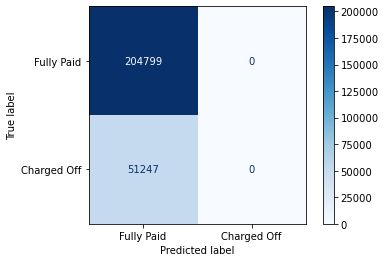

In [64]:
print(confusion_matrix(y_test,random_preds))
print(classification_report(y_test,random_preds))
print('Random Forest accuracy: ', accuracy_score(y_test, random_preds)) 
plot_confusion_matrix(clf_random, X_test,y_test,cmap= 'Blues',values_format="d", display_labels = ['Fully Paid', 'Charged Off'])

In [65]:
import xgboost as xgb

clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', xgb.XGBClassifier())])
clf_xgb.fit(X_train, y_train)
xgb_preds = clf_xgb.predict(X_test)

[[197690   7109]
 [ 15150  36097]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    204799
           1       0.84      0.70      0.76     51247

    accuracy                           0.91    256046
   macro avg       0.88      0.83      0.86    256046
weighted avg       0.91      0.91      0.91    256046



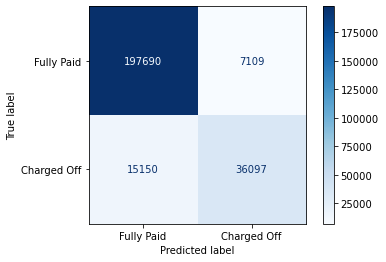

In [66]:
print(confusion_matrix(y_test,xgb_preds))
print(classification_report(y_test,xgb_preds))
plot_confusion_matrix(clf_xgb, X_test,y_test,cmap= 'Blues',values_format="d", display_labels = ['Fully Paid', 'Charged Off'])

In [67]:
from sklearn.utils import resample

df_majority = df[df['charged_off']==0] #Fully Paid
df_minority = df[df['charged_off']==1] #Charged Off

In [68]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=1234) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.value_counts('charged_off')

charged_off
1    1023615
0    1023615
dtype: int64

In [69]:
features = df_upsampled.drop('charged_off', axis=1)
target = df_upsampled.charged_off

In [70]:
# Splitting the dataset into the Training set and Test set
X_trains, X_tests, y_trains, y_tests = train_test_split(features, target, test_size=0.2, random_state=42)
print("X_train shape: Obs- {} / col- {}".format(X_trains.shape[0], X_trains.shape[1]))
print("X_test shape: Obs- {} / col- {}".format(X_tests.shape[0], X_tests.shape[1]))
print("y_train shape: Obs- {} / col- {}".format(y_trains.shape[0], 0))
print("y_test shape: Obs- {} / col- {}".format(y_tests.shape[0], 0))

X_train shape: Obs- 1637784 / col- 22
X_test shape: Obs- 409446 / col- 22
y_train shape: Obs- 1637784 / col- 0
y_test shape: Obs- 409446 / col- 0


In [71]:
model_numeric_feature = X_trains.select_dtypes(exclude=['object', 'category']).columns
model_categorical_feature = X_trains.select_dtypes(['object', 'category']).columns

In [72]:
numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('one_hot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, model_numeric_feature),
        ('categorical', categorical_transformer, model_categorical_feature)
    ]
)

clf_lgt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='liblinear'))])

clf_lgt.fit(X_trains, y_trains)
clf_pred = clf.predict(X_tests)

[[194400  10180]
 [ 74625 130241]]
              precision    recall  f1-score   support

           0       0.72      0.95      0.82    204580
           1       0.93      0.64      0.75    204866

    accuracy                           0.79    409446
   macro avg       0.83      0.79      0.79    409446
weighted avg       0.83      0.79      0.79    409446

Logistic Regression accuracy:  0.7928786702031525


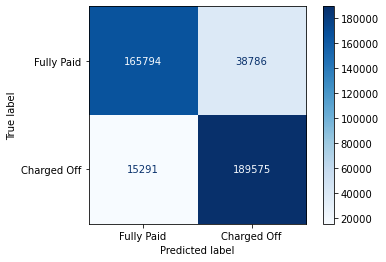

In [73]:
print(confusion_matrix(y_tests,clf_pred))
print(classification_report(y_tests,clf_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_tests, clf_pred)) 
plot_confusion_matrix(clf_lgt, X_tests,y_tests,cmap= 'Blues',values_format="d", display_labels = ['Fully Paid', 'Charged Off'])

In [80]:
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0))])
clf_dt.fit(X_trains, y_trains)
dt_pred = clf_dt.predict(X_tests)

[[162720  41860]
 [ 23067 181799]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.83    204580
           1       0.81      0.89      0.85    204866

    accuracy                           0.84    409446
   macro avg       0.84      0.84      0.84    409446
weighted avg       0.84      0.84      0.84    409446

Decision Tree accuracy:  0.8414271967487776


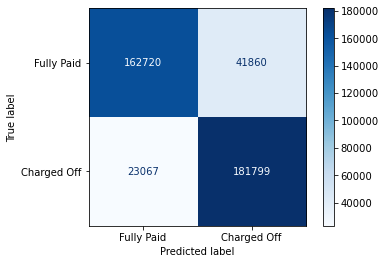

In [81]:
print(confusion_matrix(y_tests,dt_pred))
print(classification_report(y_tests,dt_pred))
print('Decision Tree accuracy: ', accuracy_score(y_tests, dt_pred)) 
plot_confusion_matrix(clf_dt, X_tests,y_tests,cmap= 'Blues',values_format="d", display_labels = ['Fully Paid', 'Charged Off'])

In [74]:
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_depth = 15,             
                                  max_features = 10, 
                                  min_samples_split = 8, 
                                  n_estimators = 100))])
clf_rf.fit(X_trains, y_trains)
rf_preds = clf_rf.predict(X_tests)

[[164322  40258]
 [ 34492 170374]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81    204580
           1       0.81      0.83      0.82    204866

    accuracy                           0.82    409446
   macro avg       0.82      0.82      0.82    409446
weighted avg       0.82      0.82      0.82    409446

Random Forest accuracy:  0.8174362431187507


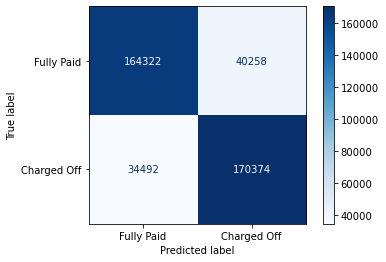

In [75]:
print(confusion_matrix(y_tests,rf_preds))
print(classification_report(y_tests,rf_preds))
print('Random Forest accuracy: ', accuracy_score(y_tests, rf_preds)) 
plot_confusion_matrix(clf_rf, X_tests,y_tests,cmap= 'Blues',values_format="d", display_labels = ['Fully Paid', 'Charged Off'])

In [76]:
clf_xgboost = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', xgb.XGBClassifier())])
clf_xgboost.fit(X_trains, y_trains)
xgboost_preds = clf_xgboost.predict(X_tests)

[[172957  31623]
 [ 11421 193445]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89    204580
           1       0.86      0.94      0.90    204866

    accuracy                           0.89    409446
   macro avg       0.90      0.89      0.89    409446
weighted avg       0.90      0.89      0.89    409446



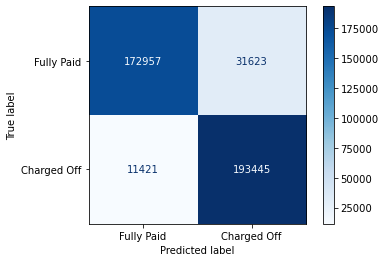

In [77]:
print(confusion_matrix(y_tests,xgboost_preds))
print(classification_report(y_tests,xgboost_preds))
plot_confusion_matrix(clf_xgboost, X_tests,y_tests,cmap= 'Blues',values_format="d", display_labels = ['Fully Paid', 'Charged Off'])